In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv('data_banknote_authentication.txt', sep=",", header=None)

In [3]:
data.rename(columns={0: "Variance", 1: "Skewness", 2: "Curtosis", 3: "Entropy", 4: "Class"}, inplace=True)

In [4]:
Y = data.loc[:, 'Class']
X = data.loc[:, :'Entropy']

In [5]:
#The features are scaled using the equation -  z=(x-μ)/σ

for colName in X.columns:
        X[colName] = (X[colName] - X[colName].mean())/X[colName].std()

In [6]:
X.insert(0, 'X0', 1)

In [7]:
X.describe()

,X0,Variance,Skewness,Curtosis,Entropy
count,1372.0,1.372000e+03,1.372000e+03,1.372000e+03,1.372000e+03
mean,1.0,-2.358010e-16,-9.880338e-17,-3.130392e-16,-3.547535e-16
std,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.0,-2.629778e+00,-2.674276e+00,-1.550738e+00,-3.501427e+00
25%,1.0,-7.762644e-01,-6.185933e-01,-6.896941e-01,-5.815259e-01
50%,1.0,2.196622e-02,6.769360e-02,-1.812046e-01,2.879594e-01
75%,1.0,8.399364e-01,8.335718e-01,4.133667e-01,7.550960e-01
max,1.0,2.248188e+00,1.879223e+00,3.835187e+00,1.733048e+00


In [8]:
#Splitting the data into training set and testing set in the ratio of 80:20

X_train=X.sample(frac=0.8,random_state=3) #random state is a seed value
X_test=X.drop(X_train.index)
Y_train=Y.sample(frac=0.8,random_state=3) 
Y_test=Y.drop(Y_train.index)
X_train.head()

,X0,Variance,Skewness,Curtosis,Entropy
1258,1,-0.370824,-0.232347,-0.413802,0.251034
712,1,1.534692,0.862755,-0.787541,0.400591
750,1,1.269351,-1.075703,0.777018,1.108349
1295,1,-1.891975,0.234816,-0.077639,-0.120106
888,1,-1.056661,-1.493863,1.763856,1.583501


In [9]:
#Converting Pandas Series to Numpy arrays

X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
X_train.shape

(1098, 5)

In [10]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

In [11]:
def costofgradient(it, i):
    sum = 0.0
    for j, row in enumerate(X_train):
        sum += (sigmoid(np.dot(w[it], row)) - Y_train[j] )*row[i]
        reg = 0.0
        if i != 0:
            reg += L*(w[it][i])
        sum += reg
    return sum

In [12]:
def updateW(locW, it):
    for i in range(5):
        locW = np.append(locW, w[it][i] - alpha*costofgradient(it, i))
    return locW

[array([0.65626556, 0.75375331, 0.66324666, 0.7943183 , 0.97527378])]


<function matplotlib.pyplot.show(*args, **kw)>

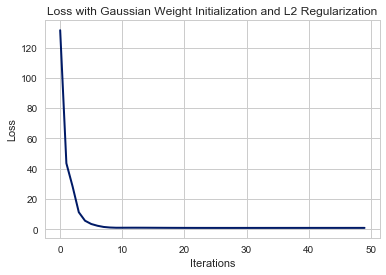

In [13]:
w= []
w.append(np.random.rand(5))
print(w)
alpha = 0.05    #Learning Rate
L = 0.00001     #Regularization Hyperparameter
iterations = 50 #epochs
x_axis=[]
y_axis = []
locW = []
x = []

for it in range(iterations):
    x_axis.append(it)
    y_pred = sigmoid(np.dot(X_test, w[it]))
    y_axis.append(np.sum((y_pred-Y_test)**2))
    locW = np.array(locW, dtype=np.longdouble)
    x = np.array(x, dtype=np.longdouble)
    x = updateW(locW, it)
    w.append(x)

plt.plot(x_axis, y_axis, color="#001a66", linewidth=2)
plt.xlabel('Iterations')  
plt.ylabel('Loss')  
plt.title('Loss with Gaussian Weight Initialization and L2 Regularization')
plt.show
# plt.savefig('Gaussian_L2.jpg', bbox_inches='tight', dpi=300, quality=80, optimize=True, progressive=True)

In [14]:
y_pred = sigmoid(np.matmul(X_test, w[iterations]))
for i, val in enumerate(y_pred):
    if(val>=0.5):
        y_pred[i]=1
    else:
        y_pred[i]=0

round_off_values = np.around(w[iterations], decimals = 5)
print(round_off_values)

[ -7.02042 -14.89322 -16.54333 -15.18754  -0.57003]


In [15]:
#Computing the Confusion Matrix
K = len(np.unique(Y_test)) # Number of classes 
confusion_matrix = np.zeros((K, K))

for i in range(len(Y_test)):
    x = Y_test[i]
    y = y_pred[i].astype(int)
    confusion_matrix[x][y] += 1
print(confusion_matrix)

#Computing Precision, Recall and F-score
precision = confusion_matrix[1][1]/(confusion_matrix[0][1] + confusion_matrix[1][1])
recall = confusion_matrix[1][1]/(confusion_matrix[1][0] + confusion_matrix[1][1])
print('The Precision is - ', precision)
print('The Recall is - ', recall)
f_score = 2*precision*recall/(precision+recall)
print('The F1-score is - ',f_score)

sse = np.sum((y_pred-Y_test)**2)
print('The Squared Sum of Errors is - ',sse)

[[149.   1.]
 [  0. 124.]]
The Precision is -  0.992
The Recall is -  1.0
The F1-score is -  0.9959839357429718
The Squared Sum of Errors is -  1.0


In [16]:
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format((Y_test.shape[0]-sse)/Y_test.shape[0]*100))

Accuracy of logistic regression classifier on test set: 99.63504
